## 1. Import Libraries

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. read and check out the data

In [317]:
df = pd.read_csv('/Users/leilagholizadehzivlaei/Desktop/Dataset/New Project/Mental_Health.survey.csv')

In [319]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [323]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


## 3. Data Preprocessing (Data Cleaning)

### 3.1. Check Initial Data Quality

In [327]:
print("\nData shape:", df.shape)



Data shape: (1259, 27)


In [329]:
print("\nMissing values summary:\n", df.isnull().sum())


Missing values summary:
 Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


### 3.2. Fix Invalid Age Values

In [332]:
# Remove rows with invalid ages (keep 18–80 range)

df = df[(df['Age'] >= 18) & (df['Age'] <= 80)]

### 3.3. Normalize Gender

In [335]:
# Convert gender to consistent categories ( Converts all letters to lowercase,Example: "FEMALE" → "female" & Removes any leading or trailing spaces
# Example: " male " → "male" .
df['Gender'] = df['Gender'].str.lower().str.strip()

df['Gender'] = df['Gender'].str.lower().str.strip().apply(
    lambda x: 'male' if 'male' in x or x in ['m', 'man'] else
              'female' if 'female' in x or x in ['f', 'woman'] else
              'other'
)

### 3.4. Parse Timestamp Column to datetime or Date

In [338]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### 3.5. Handle Missing Values

In [341]:
# Fill with 'Unknown' or mode
df['self_employed'] = df['self_employed'].fillna('Unknown')
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')


### 3.6. Drop Comment Column (if not needed)

In [344]:
df.drop(columns=['comments'], inplace=True)

In [346]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,male,United States,IL,Unknown,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,IN,Unknown,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,Unknown,Unknown,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,Unknown,Unknown,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,TX,Unknown,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,Unknown,No,No,Yes,Unknown,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,female,United States,NC,No,No,No,Unknown,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


## 4. Save Cleaned Data

In [349]:
# 1. Create folder (if not exists)
os.makedirs("df", exist_ok=True)

# 2. Save DataFrame as CSV inside that folder
df.to_csv("df/cleaned_data.csv", index=False)

# 3. Optional: print confirmation
print("✅ DataFrame saved to df/cleaned_data.csv")

✅ DataFrame saved to df/cleaned_data.csv


In [351]:
df = pd.read_csv("df/cleaned_data.csv")

In [353]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,male,United States,IL,Unknown,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,male,United States,IN,Unknown,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,male,Canada,Unknown,Unknown,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,male,United Kingdom,Unknown,Unknown,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,male,United States,TX,Unknown,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## 5. Calculate Indicators 

In [356]:
print("\nPercentage receiving treatment:", round((df['treatment'] == 'Yes').mean() * 100, 2), "%")
print("\nDistribution by Gender:\n", df['Gender'].value_counts())


Percentage receiving treatment: 50.52 %

Distribution by Gender:
 Gender
male      1170
female      57
other       24
Name: count, dtype: int64


## 6. Plot Treatment by Country

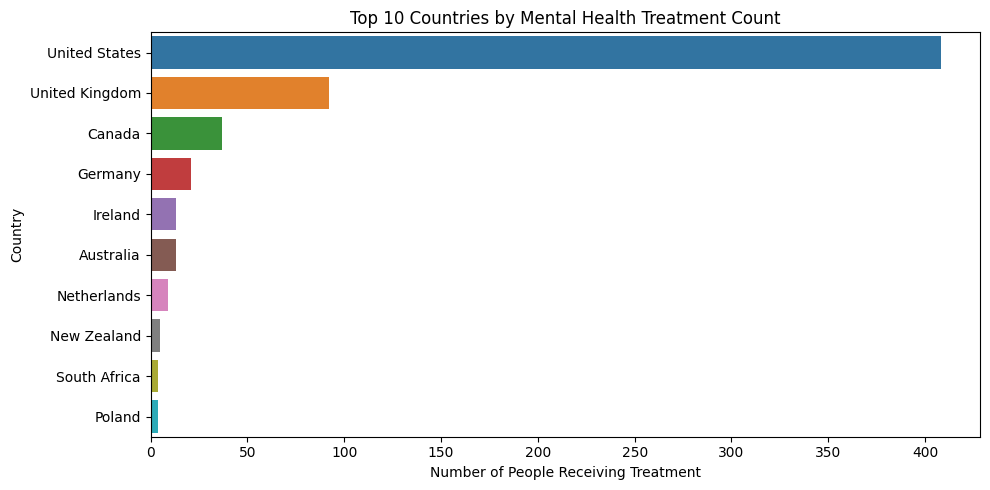

In [359]:
plt.figure(figsize=(10, 5))
treatment_by_country = df[df['treatment'] == 'Yes'].groupby('Country').size().sort_values(ascending=False).head(10)
sns.barplot(x=treatment_by_country.values, y=treatment_by_country.index)
plt.title("Top 10 Countries by Mental Health Treatment Count")
plt.xlabel("Number of People Receiving Treatment")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 7. Plot Work Interference

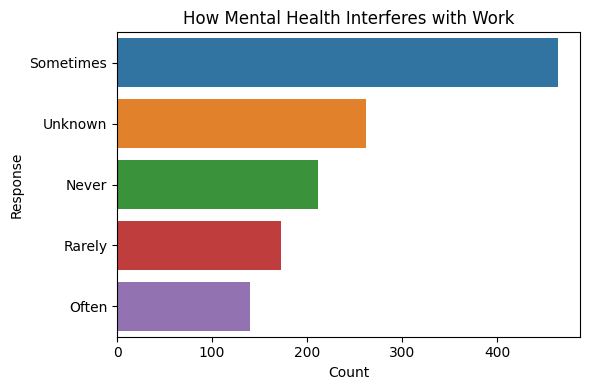

In [362]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='work_interfere', order=df['work_interfere'].value_counts().index)
plt.title("How Mental Health Interferes with Work")
plt.xlabel("Count")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

## 8. Save Aggregated Stats

In [365]:
treatment_stats = df['treatment'].value_counts(normalize=True) * 100
treatment_stats.to_csv("treatment_stats.csv")
print("✅ Treatment statistics saved to data/processed/treatment_stats.csv")

✅ Treatment statistics saved to data/processed/treatment_stats.csv


In [367]:
treatment_stats

treatment
Yes    50.519584
No     49.480416
Name: proportion, dtype: float64

## 9. Crosstab: Treatment by Gender and Country

In [390]:
# Create crosstab
treatment_ct = pd.crosstab(df['Country'], df['Gender'], margins=True)

# Save to CSV in current directory
treatment_ct.to_csv("treatment_by_country_gender.csv")

print("✅ Treatment by country/gender exported")

✅ Treatment by country/gender exported


## 10. Export Grouped Summary

In [393]:
grouped = df.groupby(['Country', 'Gender'])['treatment'].value_counts().unstack(fill_value=0).reset_index()
grouped.to_csv("treatment_summary.csv", index=False)
print("✅ treatment_summary.csv exported")

✅ treatment_summary.csv exported


## 11. Final Plot: Gender vs. Treatment

✅ treatment_by_gender.png saved


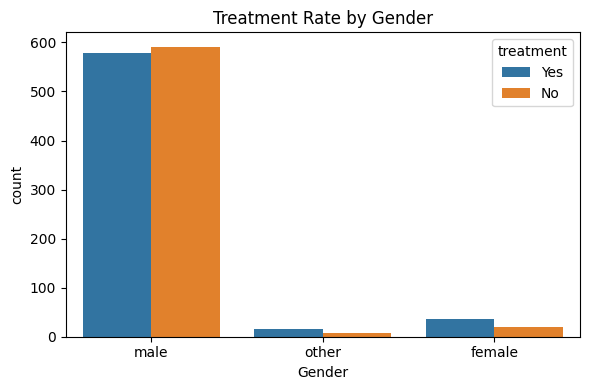

In [396]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title("Treatment Rate by Gender")
plt.tight_layout()
plt.savefig("treatment_by_gender.png")
print("✅ treatment_by_gender.png saved")

## 12. Export Data for Power BI

In [399]:
os.makedirs("dashboard", exist_ok=True)
df.to_csv("final_data_for_dashboard.csv", index=False)
print("✅ Data for Power BI dashboard saved to dashboard/final_data_for_dashboard.csv")

✅ Data for Power BI dashboard saved to dashboard/final_data_for_dashboard.csv
